# Galaxy disc analysis using data from Gaia DR3

In [1]:
import astropy
import numpy
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_hdf('Desktop/GaiaData/ages_GDR3_GSPSPEC_v01.h5')

In [2]:
print(df.columns)

Index(['source_id', 'ra', 'dec', 'r_med_geo', 'r_lo_geo', 'r_hi_geo',
       'r_med_photogeo', 'r_lo_photogeo', 'r_hi_photogeo', 'Teff_spec',
       'logg_spec', 'meta_spec', 'age_spec', 'age_error_spec', 'M_ini_spec',
       'M_ini_error_spec', 'G_spec', 'G_BP_spec', 'G_RP_spec', 'G_error_spec',
       'G_BP_error_spec', 'G_RP_error_spec', 'Teff_specjhk', 'logg_specjhk',
       'meta_specjhk', 'age_specjhk', 'age_error_specjhk', 'M_ini_specjhk',
       'M_ini_error_specjhk', 'G_specjhk', 'G_BP_specjhk', 'G_RP_specjhk',
       'G_error_specjhk', 'G_BP_error_specjhk', 'G_RP_error_specjhk',
       'Teff_specjhkg', 'logg_specjhkg', 'meta_specjhkg', 'age_specjhkg',
       'age_error_specjhkg', 'M_ini_specjhkg', 'M_ini_error_specjhkg',
       'G_specjhkg', 'G_BP_specjhkg', 'G_RP_specjhkg', 'G_error_specjhkg',
       'G_BP_error_specjhkg', 'G_RP_error_specjhkg', 'Teff_speck',
       'logg_speck', 'meta_speck', 'age_speck', 'age_error_speck',
       'M_ini_speck', 'M_ini_error_speck', 'G_spec

In [3]:
StellarAge=df.age
AgeError=df.age_error
StellarAgee=(StellarAge.head(1001))
#AgeErrorr=(AgeError.head(1001))
#StellarAgee.to_numpy()
#ages are stated in Gyr, errors associated with ages 
pd.DataFrame(StellarAgee).to_numpy()
print(StellarAgee)

0        8.419918
1        0.859806
2             NaN
3        5.861386
4        9.727170
          ...    
996           NaN
997      7.836593
998      1.166882
999      0.497010
1000    13.466495
Name: age, Length: 1001, dtype: float32


In [4]:
#Plotting first 10000 values 
Ages=(StellarAge.head(1001))
AgeEr=(AgeError.head(1001))
print(Ages, AgeEr)

0        8.419918
1        0.859806
2             NaN
3        5.861386
4        9.727170
          ...    
996           NaN
997      7.836593
998      1.166882
999      0.497010
1000    13.466495
Name: age, Length: 1001, dtype: float32 0       0.560733
1       2.120291
2       2.308507
3       2.094632
4       0.269041
          ...   
996     0.417161
997     2.628953
998     0.178671
999     0.473690
1000    2.809844
Name: age_error, Length: 1001, dtype: float32


(0.0, 13.7)

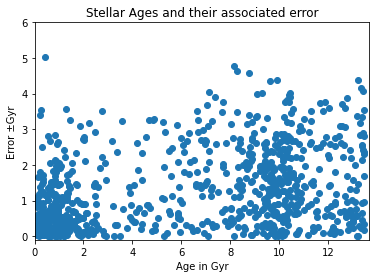

In [5]:
plt.scatter(Ages, AgeEr)
plt.title('Stellar Ages and their associated error')
plt.ylabel('Error ±Gyr')
plt.xlabel('Age in Gyr')
plt.ylim(-0.1,6) 
plt.xlim(0, 13.7)

The graph above highlights that there is no clear correlation between the error and the age of a star, this may suggest that we need to take into account different stellar properties when considering errors in stellar ages - we could use properties such as radial distance and metallicity (i.e cross calibrate) to establish a stronger connection.

In [6]:
df2=pd.read_hdf('Desktop/GaiaData/ages_orbits_GDR3_GSPSPEConly_v01.h5')

In [7]:
df2

,source_id,X_med_dgeo,X_lo_dgeo,X_hi_dgeo,Y_med_dgeo,Y_lo_dgeo,Y_hi_dgeo,Z_med_dgeo,Z_lo_dgeo,Z_hi_dgeo,...,M_ini_error,G,G_BP,G_RP,G_error,G_BP_error,G_RP_error,EBPRP,EBPRP_error,pflavour
0,2228292706060074112,11.431196,11.225464,11.663009,6.696253,6.263338,7.184050,1.436909,1.345357,1.540067,...,0.353726,-2.125617,-1.561315,-2.838709,0.109028,0.124402,0.099373,1.277393,0.159220,speck
1,4087001612275854976,3.709583,3.368453,4.068415,1.466178,1.350279,1.576360,-0.722676,-0.778547,-0.663905,...,0.084303,-2.198835,-1.578964,-2.953660,0.043347,0.048770,0.039818,1.374697,0.062960,specjhk
2,1809102729743817344,5.068924,4.820812,5.246613,5.182323,4.892756,5.586656,-1.122697,-1.211915,-1.058803,...,0.022059,-2.844352,-2.163845,-3.642578,0.028887,0.040560,0.018285,1.478733,0.044491,specjhk
3,1753644424087243904,0.264083,-1.117881,1.586132,10.838261,9.043782,12.714064,-3.848823,-4.518548,-3.208134,...,0.042756,-3.136945,-2.260201,-4.050985,0.019697,0.026179,0.015709,1.790784,0.030531,specjhkg
4,6734219621618302592,0.627929,-0.330676,1.419690,-0.241239,-0.271583,-0.216177,-1.543228,-1.739958,-1.380739,...,0.069281,-2.625538,-2.028136,-3.366118,0.069312,0.083139,0.053638,1.337983,0.098939,specjhk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411243,3545088275525629312,7.553928,7.500753,7.633901,-4.032848,-4.341381,-3.568820,3.457636,3.062187,3.720572,...,0.274716,-1.209813,-0.791824,-1.807678,0.099530,0.115296,0.088367,1.015854,0.145265,specjhk
5411244,2889506421672509568,9.553842,9.506363,9.592274,-2.232569,-2.298324,-2.151335,-1.171552,-1.206670,-1.128168,...,0.061838,-0.824734,-0.396215,-1.433132,0.024077,0.028475,0.021080,1.036917,0.035429,specjhk
5411245,3479908092359677568,7.818034,7.799509,7.832223,-1.340856,-1.398497,-1.296706,0.865263,0.837457,0.901565,...,0.014105,0.010476,0.387269,-0.547693,0.028133,0.029804,0.027157,0.934962,0.040321,specjhk
5411246,5654083549060480256,9.551065,9.519763,9.631352,-3.074365,-3.263931,-3.000456,0.722214,0.705352,0.765463,...,0.020351,-1.750884,-1.253830,-2.416193,0.027419,0.034707,0.018829,1.162363,0.039486,specjhk


In [8]:
#sorting data to get stars which are at heliocentric line-of-sight distance < 1kpc
#Given by the R_med_dgeo column in the data frame.

#distances less than 1kpc defined by:
distance=df2.R_med_dgeo
print(distance.head(2))

0    13.248114
1     3.988895
Name: R_med_dgeo, dtype: float32


In [9]:
#location=R_med_dgeo.loc[(R_med_dgeo['R_med_dgeo'] < 1.0)]
#print(location.head(100))

In [10]:
#location=distance.loc[(distance < 1.0)]
#print(location.head(1000))
#this prints the values of the distances which are < 1kpc :)
#now just to print with ages.....

In [11]:
#selecting two columns from full data frame,
fullset=df2[['age', 'R_med_dgeo', 'VR_med_dgeo']]
print(fullset.head(2))

        age  R_med_dgeo  VR_med_dgeo
0  2.027350   13.248114  -292.623016
1  2.304704    3.988895   221.259552


In [54]:
#location of the required ages sample from 0.5 Gyr to 13.0 Gyr at a fixed heliocentric distance of < 1kpc - with complete 
#freedom over the values for the median radial velocity.
#location=velocities_and_ages.loc[(velocities_and_ages['age'] )]
#print(location)
#foragesbetween2.8&3.1 Gyr
#test=df2['age'].between(2.9, 3.4)
#just create two 'bits' of information with one 2.9 < x < 3.4 
location=fullset.loc[fullset['age'].between(2.9, 3.1)]
#applying the correction for the distance < 1kpc
vrcorrection=location.loc[location['R_med_dgeo'] <= 1]
print(vrcorrection.head(100))

              age  R_med_dgeo  VR_med_dgeo
20548    3.006164    0.851233   127.430336
22580    2.962054    0.729654   167.464127
23440    3.059043    0.714701   176.133179
27333    2.960768    0.736807    99.220070
33714    2.920597    0.588724  -115.780655
...           ...         ...          ...
5382660  3.088910    0.784633   -72.880196
5387343  2.968348    0.881828   -83.861664
5399300  2.942700    0.883496  -148.810974
5400672  3.007774    0.836346   -47.222965
5400712  3.015444    0.747465  -178.833450

[69 rows x 3 columns]


The above code specifies the ages ~ 3 Gyr for stars that are less than 1kpc in terms of the distance from the sun (heliocentric distance r).

In [55]:
#standard deviation/velocity dispersion
σ3=((vrcorrection.head(100)).std()['VR_med_dgeo'])
print(σ3)

79.95616


In [49]:
location2=fullset.loc[fullset['age'].between(1.9, 2.1)]
vrcorrection2=location2.loc[location2['R_med_dgeo'] <= 1]
print(vrcorrection2.head(100))

              age  R_med_dgeo  VR_med_dgeo
2780     1.931224    0.780080   242.428619
25087    1.970559    0.939919   -49.071625
36693    2.032885    0.948339   159.660324
38032    2.053430    0.921257  -108.657173
38943    2.044654    0.815245    69.228928
...           ...         ...          ...
5389217  2.035236    0.507011   -29.046259
5393889  1.970525    0.581100  -132.329300
5396532  2.039176    0.857516   131.057251
5404485  1.956382    0.730527   184.831970
5405416  2.030671    0.970637  -208.404785

[100 rows x 3 columns]


In [50]:
σ2=(vrcorrection2.std()['VR_med_dgeo'])
print(σ2)

85.78309


As expected with the data, the velocity dispersion increases with age ~ we can see this pattern emerging from the the velocity dispersions of stars with ages ~3Gyr - 84.73167 ~2Gyr - 82.86817

# Plotting Age-Velocity Dispersions

Creating the files needed to plot the velocity dispersion relations: The midpoints of the data will be labelled as "A_midpoint", i.e velocity dispersion data for a star in the range 0 < 0.5 < 0.54 labelled as A_05

In [20]:
agelocation005=fullset.loc[fullset['age'].between(0, 0.54)]
A_05=agelocation005.loc[agelocation05['R_med_dgeo'] <= 1]
print(A_05.head(100))
#the below shows the ages of stars between 0 and 0.54 corresponding to a midpoint of 0.5 --> all being less than 1kpc from centre

            age  R_med_dgeo  VR_med_dgeo
16     0.466677    0.979322   390.463593
36     0.275925    0.898284   450.453003
296    0.227559    0.963731   230.239685
645    0.376902    0.694259    75.670708
877    0.238205    0.849990   221.644897
...         ...         ...          ...
72162  0.226407    0.788800   -89.422432
74276  0.471619    0.971283    85.859116
77625  0.321737    0.914796     6.084966
77791  0.241312    0.809348    14.373614
78007  0.477544    0.890930    12.605488

[100 rows x 3 columns]


In [39]:
agelocation0010=fullset.loc[fullset['age'].between(0.55, 1.44)]
#A_10=agelocation0010.loc[agelocation0010['R_med_dgeo'] <= 1]
print(A_10.head(100))

            age  R_med_dgeo  VR_med_dgeo
176    0.729077    0.893626   -11.575837
1010   0.724491    0.996432   172.996796
1708   0.686224    0.957681   310.880157
1978   0.826776    0.979127   -28.272308
2075   0.661168    0.848134   252.211334
...         ...         ...          ...
73782  1.077329    0.915160    53.608181
74051  0.667755    0.821726   118.094231
75363  0.650160    0.968206    32.395813
77581  0.551949    0.613122    58.416260
78197  0.757616    0.957690    36.962315

[100 rows x 3 columns]


In [58]:
agelocation0015=fullset.loc[fullset['age'].between(1.45, 1.54)]
#A_15=agelocation0015.loc[agelocation0015['R_med_dgeo'] <= 1]
σ1_5=(agelocation0015.std()['VR_med_dgeo'])
print(σ1_5)

41.938194


In [33]:
agelocation0020=fullset.loc[fullset['age'].between(1.55, 2.44)]
#A_20=agelocation0020.loc[agelocation0020['R_med_dgeo'] <= 1]


agelocation0025=fullset.loc[fullset['age'].between(2.45, 2.54)]
#A_25=agelocation0025.loc[agelocation0025['R_med_dgeo'] <= 1]

agelocation0030=fullset.loc[fullset['age'].between(2.55, 3.44)]
#A_30=agelocation0030.loc[agelocation0030['R_med_dgeo'] <= 1]

agelocation0035=fullset.loc[fullset['age'].between(3.45, 3.54)]
#A_35=agelocation0035.loc[agelocation0035['R_med_dgeo'] <= 1]

agelocation0040=fullset.loc[fullset['age'].between(3.55, 4.44)]
#A_40=agelocation0040.loc[agelocation0040['R_med_dgeo'] <= 1]

agelocation0045=fullset.loc[fullset['age'].between(4.45, 4.54)]
#A_45=agelocation0045.loc[agelocation0045['R_med_dgeo'] <= 1]

agelocation0050=fullset.loc[fullset['age'].between(4.55, 5.44)]
#A_50=agelocation0050.loc[agelocation0050['R_med_dgeo'] <= 1]

agelocation0055=fullset.loc[fullset['age'].between(5.45, 5.54)]
#A_55=agelocation0055.loc[agelocation0055['R_med_dgeo'] <= 1]

agelocation0060=fullset.loc[fullset['age'].between(5.55, 6.44)]
#A_60=agelocation0060.loc[agelocation0060['R_med_dgeo'] <= 1]

agelocation0065=fullset.loc[fullset['age'].between(6.45, 6.54)]
#A_65=agelocation0065.loc[agelocation0065['R_med_dgeo'] <= 1]

agelocation0070=fullset.loc[fullset['age'].between(6.55, 7.44)]
#A_70=agelocation0070.loc[agelocation0070['R_med_dgeo'] <= 1]

agelocation0075=fullset.loc[fullset['age'].between(7.45, 7.54)]
#A_75=agelocation0075.loc[agelocation0075['R_med_dgeo'] <= 1]

agelocation0080=fullset.loc[fullset['age'].between(7.55, 8.44)]
#A_80=agelocation0080.loc[agelocation0080['R_med_dgeo'] <= 1]

agelocation0085=fullset.loc[fullset['age'].between(8.45, 8.44)]
#A_85=agelocation0085.loc[agelocation0085['R_med_dgeo'] <= 1]

agelocation0090=fullset.loc[fullset['age'].between(8.45, 9.44)]
#A_90=agelocation0090.loc[agelocation0090['R_med_dgeo'] <= 1]

agelocation0095=fullset.loc[fullset['age'].between(9.45, 9.54)]
#A_95=agelocation0095.loc[agelocation0095['R_med_dgeo'] <= 1]

agelocation010=fullset.loc[fullset['age'].between(9.55, 10.44)]
#A_100=agelocation010.loc[agelocation010['R_med_dgeo'] <= 1]

agelocation0105=fullset.loc[fullset['age'].between(10.45, 10.54)]
#A_105=agelocation0105.loc[agelocation0105['R_med_dgeo'] <= 1]

agelocation011=fullset.loc[fullset['age'].between(10.55, 11.44)]
#A_110=agelocation011.loc[agelocation011['R_med_dgeo'] <= 1]

agelocation0115=fullset.loc[fullset['age'].between(11.45, 11.54)]
#A_115=agelocation0115.loc[agelocation0115['R_med_dgeo'] <= 1]

agelocation012=fullset.loc[fullset['age'].between(11.55, 12.44)]
#A_120=agelocation012.loc[agelocation012['R_med_dgeo'] <= 1]

agelocation0125=fullset.loc[fullset['age'].between(12.45, 12.54)]
#A_125=agelocation0125.loc[agelocation0125['R_med_dgeo'] <= 1]

agelocation013=fullset.loc[fullset['age'].between(12.55, 13.44)]
#A_130=agelocation013.loc[agelocation013['R_med_dgeo'] <= 1]



In [70]:
agelocation0010=fullset.loc[fullset['age'].between(0.5, 1.4)]
σ1_0=(agelocation0010.std()['VR_med_dgeo'])
print(σ1_0)

agelocation0020=fullset.loc[fullset['age'].between(1.5, 2.4)]
σ2_0=(agelocation0020.std()['VR_med_dgeo'])
print(σ2_0)

agelocation0030=fullset.loc[fullset['age'].between(2.5, 3.4)]
σ3_0=(agelocation0030.std()['VR_med_dgeo'])
print(σ3_0)

agelocation0040=fullset.loc[fullset['age'].between(3.5, 4.4)]
σ4_0=(agelocation0040.std()['VR_med_dgeo'])
print(σ4_0)

agelocation0050=fullset.loc[fullset['age'].between(4.5,5.4)]
σ5_0=(agelocation0050.std()['VR_med_dgeo'])
print(σ5_0)

agelocation0060=fullset.loc[fullset['age'].between(5.5, 6.4)]
σ6_0=(agelocation0060.std()['VR_med_dgeo'])
print(σ6_0)

agelocation0070=fullset.loc[fullset['age'].between(6.5, 7.4)]
σ7_0=(agelocation0070.std()['VR_med_dgeo'])
print(σ7_0)


agelocation0080=fullset.loc[fullset['age'].between(7.5, 8.4)]
σ8_0=(agelocation0080.std()['VR_med_dgeo'])
print(σ8_0)

agelocation0090=fullset.loc[fullset['age'].between(8.5, 9.4)]
σ9_0=(agelocation0090.std()['VR_med_dgeo'])
print(σ9_0)

agelocation010=fullset.loc[fullset['age'].between(9.5, 10.4)]
σ10_0=(agelocation010.std()['VR_med_dgeo'])
print(σ10_0)

agelocation011=fullset.loc[fullset['age'].between(10.5, 11.4)]
σ11_0=(agelocation011.std()['VR_med_dgeo'])
print(σ11_0)

agelocation012=fullset.loc[fullset['age'].between(11.5, 12.4)]
σ12_0=(agelocation012.std()['VR_med_dgeo'])
print(σ12_0)

agelocation013=fullset.loc[fullset['age'].between(12.5, 13.0)]
σ13_0=(agelocation013.std()['VR_med_dgeo'])
print(σ13_0)

42.8888
40.177036
40.677658
42.09683
43.28148
44.510677
45.04598
46.10732
49.787212
55.81593
46.91648
46.46324
46.981842


In [75]:
d = {'Ages': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
               'Radial_Velocity_Dispersion': [42.8888, 40.177036, 40.677658, 42.09683, 43.28148, 44.510677, 45.04598, 
                                             46.10732, 49.787212, 55.81593, 46.91648, 46.46324, 46.981842 ]}
df3 = pd.DataFrame(data=d)
df3

,Ages,Radial_Velocity_Dispersion
0,1,42.888800
1,2,40.177036
2,3,40.677658
3,4,42.096830
4,5,43.281480
5,6,44.510677
6,7,45.045980
7,8,46.107320
8,9,49.787212
9,10,55.815930


Text(0.5, 0, 'Age in Gyr')

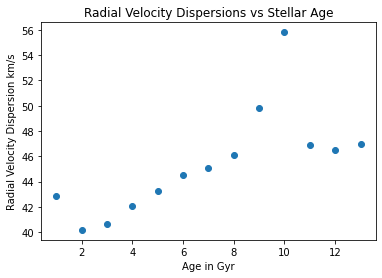

In [80]:
Agess=df3.Ages
VelocityDispersion=df3.Radial_Velocity_Dispersion
plt.scatter(Agess, VelocityDispersion)
plt.title('Radial Velocity Dispersions vs Stellar Age')
plt.ylabel('Radial Velocity Dispersion km/s')
plt.xlabel('Age in Gyr')